<a href="https://colab.research.google.com/github/JangAyeon/Python_Machine_Learning/blob/main/%5B6_2%5DPCA%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%B6%93%EA%BD%83_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%B8%ED%8A%B8%EC%9D%98_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
iris=load_iris()

columns=["sepal_length","sepal_width","petal_length","petal_width"]
iris_df=pd.DataFrame(iris.data,columns=columns)
iris_df["target"]=iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris_df.shape

(150, 5)

#**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

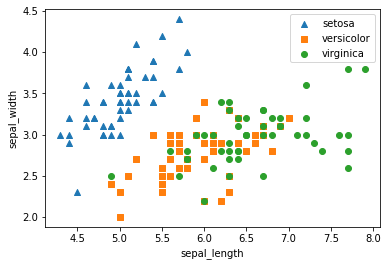

In [5]:
#setosa : 세모, versicolor : 네모, virginica : 동그라미 로 표현

markers=["^","s","o"]

#setosa : 0, versicolor : 1, virginica : 2
for i, marker in enumerate(markers):
  x_axis_data=iris_df[iris_df["target"]==i]["sepal_length"]
  y_axis_data=iris_df[iris_df["target"]==i]["sepal_width"]
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()


#**평균 : 0, 분산 : 1 인 정규 분포로 원본 데이터 변환**

In [9]:
iris_scaled=StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [11]:
iris_scaled.shape

(150, 4)

#**PCA 변환 수행**

In [16]:
pca=PCA(n_components=2)

#fit()과 transform()을 호출 -> PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [21]:
#pca로 변환된 데이터 칼럼명을 pca_component_1, pca_component_2로 명명

pca_columns=["pca_component_1","pca_component_2"]
iris_df_pca=pd.DataFrame(iris_pca,columns=pca_columns)
iris_df_pca["target"]=iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


#**PCA로 차원 축소된 피쳐들로 데이터 산포도 시각화**

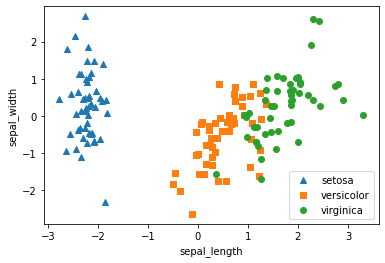

In [22]:
#setosa : 세모, versicolor : 네모, virginica : 동그라미 로 표현

markers=["^","s","o"]

#setosa : 0, versicolor : 1, virginica : 2
for i, marker in enumerate(markers):
  x_axis_data=iris_df_pca[iris_df_pca["target"]==i]["pca_component_1"]
  y_axis_data=iris_df_pca[iris_df_pca["target"]==i]["pca_component_2"]
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

#**각 PCA Component별 변동성 비율**

In [23]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


#**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [26]:
rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring="accuracy",cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [27]:
pca_X=iris_df_pca[["pca_component_1","pca_component_2"]]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring="accuracy",cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.88 0.88 0.88]
0.88
